In [2]:
import numpy as np

def error_in(filename, check=1): 
    xx = None

    with open(filename, "r") as f: 
        count = 0
        f.readline()
        for i, line in enumerate(f):
            x = []

            # if i > 0 : 

    #         if (i > 1 and i <= 101): 
    #             pass
    #         else: 
    #             continue

            # if (i > 1 and i <= 101): 
            #     continue
            # else: 
            #     pass

            count += 1 

            vals = line.rstrip().split(",")
            vals = [float(v) for v in vals]

            if check == 1: 
                # x.append( np.abs(vals[0] - vals[18]) ) 
                x.append( np.abs(vals[0] - vals[19]) ) 
                # x.append( np.abs(vals[0] - vals[14]) ) 
                x.append( np.abs(vals[0] - vals[15]) ) 
                # x.append( np.abs(vals[0] - vals[16]) ) 
                x.append( np.abs(vals[0] - vals[17]) ) 
                x.append( np.abs(vals[0] - vals[20]) ) 
                # x.append( np.abs(vals[0] - vals[6]) ) 
                x.append( np.abs(vals[0] - vals[10]) ) 
                # x.append( np.abs(vals[0] - vals[8]) ) 
                x.append( np.abs(vals[0] - vals[12]) ) 
            else:
                # x.append( np.abs(vals[0] - vals[20]) ) 
                x.append( np.abs(vals[0] - vals[21]) ) 
                # x.append( np.abs(vals[0] - vals[16]) ) 
                x.append( np.abs(vals[0] - vals[17]) ) 
                # x.append( np.abs(vals[0] - vals[18]) ) 
                x.append( np.abs(vals[0] - vals[19]) ) 
                x.append( np.abs(vals[0] - vals[22]) ) 
                # x.append( np.abs(vals[0] - vals[6]) ) 
                x.append( np.abs(vals[0] - vals[10]) ) 
                # x.append( np.abs(vals[0] - vals[8]) ) 
                x.append( np.abs(vals[0] - vals[12]) ) 
            if xx is None: 
                xx = np.array(x)
            else: 
                xx += x

    xx = xx/ (count) 
    
    yy = np.copy(xx)
    for i in range(len(xx)): 
        yy[i] = yy[i]/ xx[1]
    
    return yy
    

filename_cifar = "outputs/CIFAR/DenseNet121_0.1_0.0005_0.9_SGD_350_1111/predicted_acc_T_2/300.csv"
filename_cifar100 = "outputs/CIFAR-100/DenseNet121_0.1_0.0005_0.9_SGD_350_1111/predicted_acc_T_2/300.csv"
filename_imagenet200 = "outputs/ImageNet-200/DenseNet121_0.0001_0.0_0.0_Adam_50_1111/predicted_acc_T_4/45.csv"
filename_imagenet = "outputs/ImageNet/DenseNet121_0.0001_0.0_0.0_Adam_10_1111/predict_acc_T_3/9.csv"
filename_fmow = "outputs/FMoW/DenseNet121_0.0001_0.0_0.0_Adam_50_1111/predicted_acc_T_2/45.csv"
filename_mnist = "outputs/MNIST/FCN_0.01_1e-05_0.9_SGD_50_1111/predicted_acc_T/45.csv"
filename_entity13 = "outputs/entity13/DenseNet121_0.1_0.0001_0.9_SGD_300_1111/predicted_acc_T_4/270.csv"
filename_entity30 = "outputs/entity30/DenseNet121_0.1_0.0001_0.9_SGD_300_1111/predicted_acc_T_4/270.csv"
filename_nonliving26 = "outputs/nonliving26/DenseNet121_0.1_0.0001_0.9_SGD_450_1111/predicted_acc_T_4/420.csv"
filename_living17 = "outputs/living17/DenseNet121_0.1_0.0001_0.9_SGD_450_1111/predicted_acc_T_4/420.csv"


datasets = ["CIFAR10", "CIFAR100", "ImageNet200", "ImageNet", "FMoW-Wilds", "MNIST", "Entity13", "Entity30", "Nonliving26", "Living17"]  

methods = ["IM" , "AC", "DOC", "GDE", "ATC-MC (Ours)", "ATC-NE (Ours)"]

plot_arr = []

plot_arr.append(error_in(filename_cifar, 2))
plot_arr.append(error_in(filename_cifar100, 2))
plot_arr.append(error_in(filename_imagenet200, 1))
plot_arr.append(error_in(filename_imagenet, 1))
plot_arr.append(error_in(filename_fmow, 2))
plot_arr.append(error_in(filename_mnist, 2))
plot_arr.append(error_in(filename_entity13, 1))
plot_arr.append(error_in(filename_entity30, 1))
plot_arr.append(error_in(filename_nonliving26, 1))
plot_arr.append(error_in(filename_living17, 1))





FileNotFoundError: [Errno 2] No such file or directory: 'outputs_rebuttal/CIFAR/DenseNet121_0.1_0.0005_0.9_SGD_350_1111/predicted_acc_T_2/300.csv'

In [26]:
import matplotlib.pyplot as plt 
from scipy import stats


plt.rcParams['text.usetex'] = True #Let TeX do the typsetting
plt.rcParams['text.latex.preamble'] = [r'\usepackage{sansmath}', r'\sansmath'] #Force sans-serif math mode (for axes labels)
plt.rcParams['font.family'] = 'sans-serif' # ... for regular text
plt.rcParams['font.sans-serif'] = 'Helvetica, Avant Garde, Computer Modern Sans serif' # Choose a nice font here

import seaborn as sns
import pandas as pd 
import numpy as np
import os 


def get_acc(filename): 
    
    seeds_err = None
    for name in os.listdir(filename):
        yy = None
#         print("ss")
        acc_file = filename + name + "/predicted_acc/"
        if name.startswith("DenseNet") or name.startswith("FCN") or name.startswith("dist"): 

            if os.path.exists(filename + name + "/predicted_acc/"): 
                acc_file = filename + name + "/predicted_acc/"
            else: 
                acc_file = filename + name + "/predict_acc_T_combine/"

            # print(acc_file)

            if len(os.listdir(acc_file))>=2: 
                acc_file = acc_file + '45.csv'
            else: 
                acc_file = acc_file + os.listdir(acc_file)[0]


            xx = None
            with open(acc_file, "r") as f: 
                count = 0

                if "RxRx1" not in acc_file: 
                    f.readline()

                for i, line in enumerate(f):
                    x = []

                    count += 1 

                    vals = line.rstrip().split(",")
                    vals = [float(v) for v in vals]

                    # print(len(vals))
                    x.append(vals[0] ) 
                    x.append(vals[18]) 
                    x.append(vals[19]) 
                    x.append(vals[14]) 
                    x.append(vals[15]) 
                    x.append(vals[16]) 
                    x.append(vals[17]) 
                    x.append(vals[20]) 
                    x.append(vals[6]) 
                    x.append(vals[10]) 
                    x.append(vals[8]) 
                    x.append(vals[12]) 

                    if xx is None: 
                        xx = abs(np.array(x) - x[0])
                    else: 
                        xx += abs(np.array(x) - x[0])
                        
            xx = xx/ (count) 

            yy = np.copy(xx)
            for i in range(len(xx)): 
                yy[i] = (yy[i])/ (xx[4])
        
            if seeds_err is None: 
                seeds_err = yy
            else:
                seeds_err += yy
            
    return seeds_err /4 



filenames = [ "outputs_rebuttal/CIFAR/",
             "outputs_rebuttal/CIFAR-100/",
             "outputs_rebuttal/ImageNet-200/", 
             "outputs_rebuttal/ImageNet/", 
             "outputs_rebuttal/FMoW/", 
             "outputs_rebuttal/RxRx1/", 
             "outputs_rebuttal/Amazon/", 
             "outputs_rebuttal/CivilComments/", 
             "outputs_rebuttal/MNIST/", 
             "outputs_rebuttal/entity13/",
             "outputs_rebuttal/entity30/", 
             "outputs_rebuttal/nonliving26/", 
             "outputs_rebuttal/living17/"]

datasets = ["CIFAR10", "CIFAR100", "ImageNet200", "ImageNet", "FMoW-Wilds", "RxRx1-Wilds", "Amazon-Wilds", "CivilCo.-Wilds","MNIST", "Entity13", "Entity30", "Nonliving26", "Living17"]  

methods = ["IM" , "AC", "DOC", "GDE", "ATC-MC (Ours)", "ATC-NE (Ours)"]

plot_arr = []

for idx, ff in enumerate(filenames): 
    plot_arr.append(get_acc(ff))

idx = [2, 4, 6, 7, 9, 11]

for i in range(len(datasets)):
    plot_arr[i] = plot_arr[i][idx]

    print(np.array(plot_arr[i]))


[0.85620465 1.         0.93057643 0.55079406 0.35734109 0.32464155]
[0.58001722 1.         0.61835617 0.41732821 0.23236711 0.19906061]
[0.96602821 1.         0.92512628 0.40852758 0.2277581  0.19894502]
[1.18843275 1.         0.92735395 0.75946093 0.307604   0.5769043 ]
[0.54436129 1.         0.55414926 0.74571166 0.3354912  0.34181587]
[1.1825714  1.         1.23470969 1.24644575 0.94205437 0.92383552]
[0.96259978 1.         0.96104598 7.53101385 0.68254565 0.66758029]
[0.97983022 1.         0.99675707 1.51153246 0.64731747 0.64731747]
[1.11852247 1.         0.98849683 1.74168254 0.14491275 0.24730343]
[1.02002424 1.         0.97433634 0.96338734 0.43395933 0.33361615]
[1.0186683  1.         0.95821661 0.89117039 0.54345357 0.44937154]
[1.05876148 1.         0.97572663 1.00472495 0.65995637 0.61969621]
[1.03903764 1.         0.98023603 0.91641436 0.50343261 0.42791815]


In [28]:
import matplotlib.pyplot as plt 
from scipy import stats


plt.rcParams['text.usetex'] = True #Let TeX do the typsetting
plt.rcParams['text.latex.preamble'] = [r'\usepackage{sansmath}', r'\sansmath'] #Force sans-serif math mode (for axes labels)
plt.rcParams['font.family'] = 'sans-serif' # ... for regular text
plt.rcParams['font.sans-serif'] = 'Helvetica, Avant Garde, Computer Modern Sans serif' # Choose a nice font here

import seaborn as sns
import pandas as pd 
import numpy as np

color_map = [""]

# sns.set_style("whitegrid")
markers = ['+', '.', 'x', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11 ]
def get_scatter_plot(xx,yy, methods, datasets, fc = 20, name=None): 
    fig, ax = plt.subplots()
    fig.set_figheight(6)
    fig.set_figwidth(6)
    ax.yaxis.grid( linestyle='--', alpha = 0.5)
    plots = []
    for i, (x) in enumerate(xx):
        alpha = 1.0
        if i >= 4:
            alpha = 0.9
            marker_i = markers[3]
            s_i = 200
        else: 
            alpha = 0.7
            marker_i = markers[2]
            s_i = 100
        plots.append(plt.scatter(x=x, y=yy, marker=marker_i,s=s_i, alpha = alpha, label = methods[i]))
    

    
    # now plot both limits against eachother
#     plt.legend(plots, methods, fontsize=fc)
#     plt.set
#     ax.set_aspect('equal')
    
    plt.xlim((0.0, 1.1))
    plt.xticks( fontsize=fc)
    plt.yticks(ticks = yy, labels = datasets, fontsize=fc)
    plt.xlabel("Rescaled Estimation Error", fontsize=fc)
    # plt.ylabel("Predicted Accuracy", fontsize=fc)
    ax.legend(loc='upper center', bbox_to_anchor=(0.31, -0.13),
          fancybox=True, shadow=True, ncol=3, fontsize=fc)
    plt.axvline(1.0, linestyle='--', color="k", alpha = 0.5)
    plt.savefig("figures/" + "intro_b.pdf", transparent=True, bbox_inches='tight')
    plt.show()
    


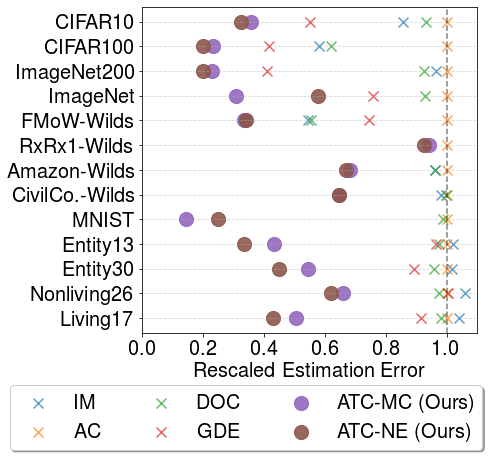

In [29]:
get_scatter_plot(np.array(plot_arr).T, np.arange(len(datasets))[::-1], methods, datasets)

# print(np.array(plot_arr).T.shape)
# print( np.arange(len(methods))[::-1].shape)